Hyper-Q Product Testing - Analytical Report - Hunt The Wumpus

In [1]:
# (c) Beyond Ordinary Software Solutions
# All rights reserved
# 
# Runs the Hunt The Wumpus game sample and generates graphs and analysis of the learning.
# Hunt The Wumpus was a trademark once. No claim is made here to this mark.
# Based loosely on https://en.wikipedia.org/wiki/Hunt_the_Wumpus
# No smell in the game. Just walk around and avoid the wumpus, get treasure, eat food, leave.
# Food was added to make the game end after 640 steps if the player just walked around aimlessly
#

import subprocess

import sys
sys.path.append("../../analysis")
sys.path.append("../bin/Debug")

# Use the hyper-state enumerator, or not
hyper = True
# number of episodes of training to complete
episodes = 5000
# number of episides between status dumps
interval = 250
# number of episode warmups (no dyna, no memory, no obsession)
warmups=0
# How big the dyna memory buffer will be
dyna_size = 150
# "q" or "qq", single or double Q
q_type = "q"
# number of elements in the memory. episodes in episodic memory, updates for non-episodic
memory = 250
# how to update - "offpolicy" or "onpolicy"
policy = "offpolicy"
# should I obsess about wins and improvements?
obsession = True
# type of reward model, "model1" or "model2"
model = "model2"
# randomize the playing cave each episode, or learn just one cave?
randomize = True
# dimensions of the cave (rowsxcolumns).
dims = "12x12"
# true or false if negative/positive memory replay split is used
negpos = True
# true or false if using episodic memory
episodic = True

title = f"Wumpus {model}"
project_title = ""
if hyper :
    title = f"{title} Hyper "
    project_title = "hyper"

title = f"{title} {q_type.upper()} Heatmap e{episodes} w{warmups} m{memory}"
project_title = f"{project_title}-{q_type}-{model}-{episodes}x{interval}-{policy}-w{warmups}-mem{memory}"

if not dims is None :
    title = f'{title} {dims}'
    project_title = f"{project_title}-{dims}"

if dyna_size > 0 :
    title = f"{title} {dyna_size} Dyna x 75"
    project_title = f"{project_title}-dyna-{dyna_size}-75"
else :
    title = f"{title} No Dyna"

if obsession:
    title = f"{title} Obsession"
    project_title = f"{project_title}-obsession"



In [2]:
#
# Make the input file
#
with open("input.in","w") as fp :
    fp.write(f"{episodes}\n")
    fp.write(f"{interval}\n")
    fp.write(f"memory_size={memory}\n")
    if episodic :
        fp.write("episodic\n")
    fp.write(f"{policy}\n")
    if(hyper) :
        fp.write("hyper\n")
    if negpos:
        fp.write("negpos\n")
    fp.write(f"{model}\n")
    if(randomize) :
        fp.write("randomize\n")
    if(obsession) :
        fp.write("obsession\n")
    if(not dims is None) :
        fp.write(f"dims={dims}\n")
    fp.write(f"dyna_size={dyna_size}\n")
    fp.write("dyna_iters=75\n")
    fp.write(f"warmup={warmups}\n")
    fp.write("a=1,.9999997,.65\n")
    fp.write("g=0.997,1\n")
    fp.write("e=0.9,.9999991,.1\n")
    fp.write("h=0.6,.99999991,0.0\n")
    fp.write(f"{q_type}\n")


In [3]:
s = subprocess.check_output(["../Game/bin/Debug/HuntTheWumpus.exe","/in=input.in"],stderr=subprocess.STDOUT)
o = s.decode('utf-8')
print(o)

Reading input from input.in
cmdline: 5000
cmdline: 250
cmdline: memory_size=250
cmdline: episodic
cmdline: offpolicy
cmdline: hyper
cmdline: negpos
cmdline: model2
cmdline: randomize
cmdline: obsession
cmdline: dims=12x12
cmdline: dyna_size=150
cmdline: dyna_iters=75
cmdline: warmup=0
cmdline: a=1,.9999997,.65
cmdline: g=0.997,1
cmdline: e=0.9,.9999991,.1
cmdline: h=0.6,.99999991,0.0
cmdline: q
g=0.997, decay=1, min=0.997
e=0.9, decay=0.9999991, min=0.1
a=1, decay=0.9999997, min=0.65
t=0.95, decay=1, min=0.95
Q enabled
HYPER enabled
NEGPOS memory enabled
Dyna enabled 150
Dyna freq 0.2
Memory enabled 250 EPISODIC
warmups enabled 0
OFF Policy Evaluation
Randomizing training Worlds
== Env Metrics ==
   Total Reward: 4.976031984
   Average Reward: -172.74259666411 over 5021 episodes
   # Actions Taken: 16
   Episodes Take: 87.42 ms
   Total Episode Time: 438919.65 ms
   Reminiscing Takes: 162.41 ms
   Total Reminiscing Time: 812055.67 ms (185.01 %)
   Action Selection Takes: 0.00 ms
   Tot

In [4]:

import HeatMap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
#
# Load the files manifest and process the heatmaps for each files
#
with open("frames.txt") as fp:
    l = fp.readlines()
    fig,ax = plt.subplots(figsize=(11,8))
    ylabels = [f'Action {i}' for i in range(0,8)]
    png_files = []
    for s in l :
        s = s.strip()
        q1 = np.loadtxt(s,delimiter=',',usecols=range(8))
        fig,ax1 = plt.subplots(figsize=(11,8))
        im,_ = HeatMap.heatmap(q1.T, ylabels,None,ax=ax1,cmap="RdBu",cbarlabel=f"{q_type.upper()} Value",aspect='auto')
        ax1.title.set_text(title)
        fname = s.replace(".csv","_heatmap.png")
        fig.savefig(fname, facecolor=fig.get_facecolor())
        png_files.append(fname)
        plt.close(fig)
plt.close()



In [5]:
import animate
animation_file = f'HUNT-{project_title}.gif'
ai = animate.animate(".",png_files,output_path=animation_file)

Episode 249
Episode 499
Episode 749
Episode 999
Episode 1249
Episode 1499
Episode 1749
Episode 1999
Episode 2249
Episode 2499
Episode 2749
Episode 2999
Episode 3249
Episode 3499
Episode 3749
Episode 3999
Episode 4249
Episode 4499
Episode 4749
Episode 4999
Animated GIF saved at HUNT-hyper-q-model2-5000x250-offpolicy-w0-mem250-12x12-dyna-150-75-obsession.gif


In [6]:
from IPython.display import Image
Image(url=ai)

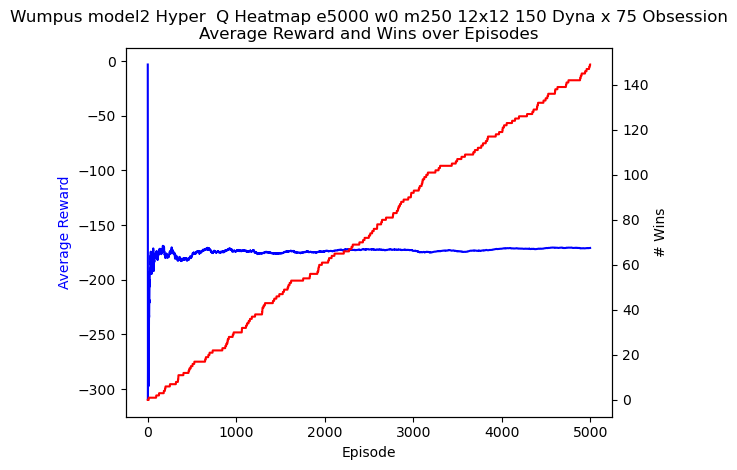

In [7]:

q1 = pd.read_csv(f"wumpus-result-{episodes}-final.csv",sep=',',header=0)
fig,ax1 = plt.subplots()
color = "blue"
ax1.set_xlabel("Episode")
ax1.set_ylabel("Average Reward", color=color)
ax1.plot(q1["avgreward"],color=color)
ax2 = ax1.twinx()
color = "red"
ax2.set_ylabel("# Wins")
ax2.plot(q1["wins"],color=color)
plt.title(f'{title}\nAverage Reward and Wins over Episodes')
fig.tight_layout()
fig_filename = f"{project_title}-Reward-Wins-Analysis.png"
fig.savefig(fig_filename, facecolor=fig.get_facecolor())
plt.show()

In [8]:
winpct = q1.wins.max() / q1.shape[0]
print(f'Win pct={winpct*100.0}')
q1.describe()

Win pct=2.98


,deaths,escapes,totalreward,avgreward,epsilon,alpha,gold,food,wins
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1582.13620,843.364000,-172.838771,-173.910750,0.897978,0.999250,0.154400,59.213600,74.999800
std,913.12359,487.300022,183.054859,6.151458,0.001167,0.000433,0.361368,5.443262,43.222279
min,1.00000,0.000000,-1767.399826,-309.988892,0.895959,0.998501,0.000000,0.000000,0.000000
25%,798.75000,414.000000,-259.543067,-174.570108,0.896967,0.998876,0.000000,58.000000,38.000000
50%,1568.50000,859.000000,-118.598329,-173.309525,0.897977,0.999250,0.000000,61.000000,73.000000
75%,2373.00000,1265.250000,-39.989274,-172.144373,0.898987,0.999625,0.000000,63.000000,112.000000
max,3159.00000,1692.000000,226.898869,-3.005996,0.899999,1.000000,1.000000,64.000000,149.000000


In [9]:
import asciiv
colors = {
    '@' : (255,255,255),
    '$' : (255,215,0),
    'W' : (255,0,0),
    '#' : (153,101,21),
    'O' : (230,190,138),
    '+' : (0,255,0),
    '=' : (205,133,63)
}

log_file_path = f'eval-final-{episodes}x{interval}-{policy}.log'  # Replace with the path to your log file
output_gif_path = f'gameplay-{project_title}.gif'

# Parse log file into frames
log_frames = asciiv.parse_log_file(log_file_path)

# Render frames into images
image_frames = [asciiv.render_frame(frame,colors=colors) for frame in log_frames]

# Create animated GIF
asciiv.create_animated_gif(image_frames, output_gif_path)

print(f"Animated GIF created at {output_gif_path}")


Animated GIF created at gameplay-hyper-q-model2-5000x250-offpolicy-w0-mem250-12x12-dyna-150-75-obsession.gif


In [10]:
Image(url=output_gif_path)

In [11]:
import os
ir = range(interval-1,episodes,interval)
for i in ir :
    fname = f'eval-{i}-{episodes}x{interval}-{policy}.log'
    gif_name = f'eval-{i}-{episodes}x{interval}-{policy}.gif'
    if os.path.exists(fname) :
        # Parse log file into frames
        log_frames = asciiv.parse_log_file(fname)

        # Render frames into images
        image_frames = [asciiv.render_frame(frame,colors=colors) for frame in log_frames]

        # Create animated GIF
        asciiv.create_animated_gif(image_frames, gif_name)
        print(gif_name)


eval-249-5000x250-offpolicy.gif
eval-499-5000x250-offpolicy.gif
eval-749-5000x250-offpolicy.gif
eval-999-5000x250-offpolicy.gif
eval-1249-5000x250-offpolicy.gif
eval-1499-5000x250-offpolicy.gif
eval-1749-5000x250-offpolicy.gif
eval-1999-5000x250-offpolicy.gif
eval-2249-5000x250-offpolicy.gif
eval-2499-5000x250-offpolicy.gif
eval-2749-5000x250-offpolicy.gif
eval-2999-5000x250-offpolicy.gif
eval-3249-5000x250-offpolicy.gif
eval-3499-5000x250-offpolicy.gif
eval-3749-5000x250-offpolicy.gif
eval-3999-5000x250-offpolicy.gif
eval-4249-5000x250-offpolicy.gif
eval-4499-5000x250-offpolicy.gif
eval-4749-5000x250-offpolicy.gif
eval-4999-5000x250-offpolicy.gif
